In [0]:
from google.colab import files
files.upload()

Saving trips.csv to trips.csv


{u'trips.csv': '1,1,40,26,2.2\r\n1,2,4,49,8.1\r\n1,3,3,35,6.8\r\n1,4,2,75,9.3\r\n1,5,2,30,8\r\n1,6,4,52,9.9\r\n1,7,6,48,13\r\n1,8,3,48,12.3\r\n1,11,1,30,16.9\r\n1,13,2,50,21.9\r\n2,1,29,53,8.3\r\n2,2,51,27,1.6\r\n2,3,5,51,9\r\n2,4,5,55,15.8\r\n2,5,5,58,18\r\n2,6,5,65,20.3\r\n2,7,1,30,16.5\r\n2,8,8,71,12.9\r\n2,9,6,72,7\r\n2,12,1,60,38.9\r\n2,15,6,48,14\r\n3,1,28,53,11.9\r\n3,2,11,67,8.8\r\n3,3,55,34,1.9\r\n3,4,8,57,12.8\r\n3,5,3,67,18.2\r\n3,6,5,86,22.4\r\n3,7,3,85,19.2\r\n3,8,4,85,17.4\r\n3,9,2,90,12.7\r\n3,11,3,52,14.3\r\n3,12,1,90,19.7\r\n3,14,1,165,54.1\r\n3,15,2,98,20.2\r\n4,1,31,55,9.7\r\n4,2,6,77,12.6\r\n4,3,4,36,9\r\n4,4,36,37,2.2\r\n4,5,5,52,8.8\r\n4,6,3,35,13.8\r\n4,7,4,70,21.4\r\n4,8,4,79,17.8\r\n4,9,2,112,22\r\n4,12,2,90,9\r\n4,13,1,90,29.9\r\n5,1,27,60,11.4\r\n5,2,6,82,19.7\r\n5,3,4,70,20.9\r\n5,4,7,48,7.9\r\n5,5,38,31,1.8\r\n5,6,12,60,8.4\r\n5,7,3,58,12.1\r\n5,8,6,83,16.8\r\n5,9,4,59,23\r\n5,11,1,90,29.8\r\n5,12,4,41,12.3\r\n5,19,1,240,58.1\r\n6,1,22,66,13\r\n6,2,11,66,20

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('trips.csv', names = ['departure', 'arrival', 'count', 'time', 'dist'])

In [0]:
print(data[:5], data[-5:])

(   departure  arrival  count  time  dist
0          1        1   40.0    26   2.2
1          1        2    4.0    49   8.1
2          1        3    3.0    35   6.8
3          1        4    2.0    75   9.3
4          1        5    2.0    30   8.0,      departure  arrival  count  time  dist
205         21       15   1.62    30  32.1
206         21       21  19.44    18   1.0
207         22        1   1.62   140  84.8
208         22        2   4.86   120  72.6
209         22       22  29.16    25   1.5)


In [0]:
data.loc[data['departure'] > 10, 'count'] = data['count'] * 1.62

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
departure    210 non-null int64
arrival      210 non-null int64
count        210 non-null float64
time         210 non-null int64
dist         210 non-null float64
dtypes: float64(2), int64(3)
memory usage: 8.3 KB


In [0]:
import seaborn as sns

In [0]:
sns.pairplot(data)

In [0]:
for col in data.columns:
  data.hist(col)

In [0]:
data[:5]

,departure,arrival,count,time,dist
0,1,1,40.0,26,2.2
1,1,2,4.0,49,8.1
2,1,3,3.0,35,6.8
3,1,4,2.0,75,9.3
4,1,5,2.0,30,8.0


$$F_i,_j = \frac{Count_i,_j}{A_i*Dep_i*Arr_j*B_j},  A_{start}= B_{start} = 1$$

In [0]:
import numpy as np

# По пдфке

In [0]:
def get_dep(i):
  return np.sum(data.loc[data.departure == i, 'count'])

def get_arr(j):
  return np.sum(data.loc[data.arrival == j, 'count'])

def get_count(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['count'])
  if count == 1:
    return float(data[(data.departure == i) & (data.arrival == j)]['count'])
  else:
      return 0

def get_time(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['time'])
  if count == 1:
    return int(data[(data.departure == i) & (data.arrival == j)]['time'])
  else:
      return 0

def get_dist(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['dist'])
  if count == 1:
    return float(data[(data.departure == i) & (data.arrival == j)]['dist'])
  else:
      return 0

def get_f(i, j, a = 1, b = 1):
  if get_dep(i) == 0 or get_arr(j) == 0 or get_count(i, j) == 0:
    return 0
  else:
    return get_count(i, j) / (a * get_dep(i) * get_arr(j) * b)

get_f(22, 21)

0

In [0]:
def get_c(i, j):
  return get_time(i, j)

In [0]:
F = np.zeros((len(data.departure.unique()), len(data.arrival.unique())))
c = F
for i in range(F.shape[0]):
  for j in range(F.shape[1]):      
    F[i, j] = get_f(i + 1, j + 1)
    c[i, j] = get_c(i + 1, j + 1)

##  Отрисовка

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

In [0]:
def f(x):
  return -np.log(x)
F_1d = F[F != 0]
F_1d = map(f, F_1d)
c_1d = c[c != 0]

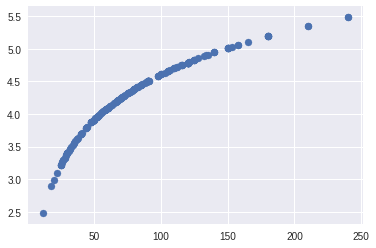

In [0]:
plt.scatter(c_1d, F_1d)
plt.show()

# По лекции:
$$d_i,_j = A_i * B_j * L_i * W_j * e^{-\alpha * T_i,_j}; \, L_i = Dep_i, \, W_j = Arr_j, \, T_i,_j = time_i,_j$$


In [0]:
def get_alpha():
  return 1

In [0]:
def get_L(i):
  return np.sum(data.loc[data.departure == i, 'count'])

In [0]:
def get_W(j):
  return np.sum(data.loc[data.arrival == j, 'count'])

In [0]:
def get_T(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['count'])
  if count == 1:
    return float(data[(data.departure == i) & (data.arrival == j)]['count'])
  else:
      return 0

In [0]:
def get_time(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['time'])
  if count == 1:
    return int(data[(data.departure == i) & (data.arrival == j)]['time'])
  else:
      return 0

In [0]:
def get_dist(i, j):
  count = len(data[(data.departure == i) & (data.arrival == j)]['dist'])
  if count == 1:
    return float(data[(data.departure == i) & (data.arrival == j)]['dist'])
  else:
      return 0    

In [0]:
def A_init():
  return np.ones((len(data.departure.unique())))

def A_next(B_prev, alpha):
  A_next = np.zeros((B_prev.shape))
  B_mul_W = np.zeros((B_prev.shape))
  
  for i in range(len(A_next)):
    for j in range(len(B_prev)):
      B_mul_W[j] = B_prev[j] * get_W(j)
    A_next[i] = np.sum(B_mul_W * np.exp(-1 * alpha * get_T(i, j))) ** (-1)
  return A_next

In [0]:
def B_init():
  return np.ones((len(data.arrival.unique())))

def B_next(A_curr, alpha):
  B_next = np.zeros((A_curr.shape))
  A_mul_L = np.zeros((A_curr.shape))
  
  for j in range(len(B_next)):
    for i in range(len(A_curr)):
      A_mul_L[i] = A_curr[i] * get_L(i)
    B_next[i] = np.sum(A_mul_L * np.exp(-1 * alpha * get_T(i, j))) ** (-1)
  return B_next

In [0]:
def get_A_B(alpha):
  epochs = 2
  i = 1
  A = A_init()
  B = B_init()
  while i < epochs:
    A = A_next(B, alpha)
    B = B_next(A, alpha)
    i += 1
  return A, B

In [0]:
def get_D(alpha):
  A, B = get_A_B(alpha)  
  def get_d(i, j, alpha):    
    return A[i - 1] * B[j - 1] * get_L(i) * get_W(j) * np.exp(-1 * alpha * get_T(i, j))
  
  D = np.zeros((len(data.departure.unique()), len(data.arrival.unique())))
  for i in range(D.shape[0]):
    for j in range(D.shape[1]):      
      D[i, j] = get_d(i + 1, j + 1, alpha)
  return D

In [0]:
def get_square_error(D_estimated):
  result = 0
  for i in range(len(D_estimated[0])):
    for j in range(len(D_estimated[1])):
      result += (get_T(i, j) - D_estimated[i, j]) ** 2
  return result

def get_sqerror(alpha):
  D = get_D(alpha)
  return get_square_error(D)

In [0]:
 from scipy import optimize

In [0]:
D = get_D(1)
c = D
for i in range(D.shape[0]):
  for j in range(D.shape[1]):      
    c[i, j] = get_c(i + 1, j + 1)

In [0]:
alphas = np.linspace(-10, 10, 201)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


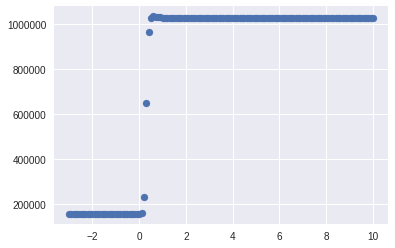

In [0]:
plt.scatter(alphas, map(get_sqerror, alphas))
plt.show()

# Отрисовка

In [0]:
D_1d = D[D != 0]
D_1d = map(f, D_1d)
c_1d = c[c != 0]

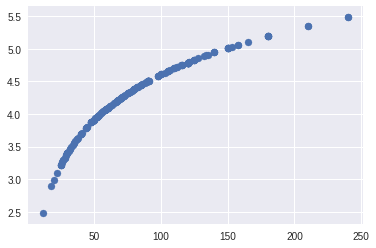

In [0]:
plt.scatter(c_1d, D_1d)
plt.show()

In [0]:
from math import factorial as fact
from math import log as ln
from math import 

In [0]:
import math
def C_n_k(n, k):
  x = int(n)
  y = int(k)
  if y == x:
      return 1
  elif y == 1:         # see georg's comment
      return x
  elif y > x:          # will be executed only if y != 1 and y != x
      return 0
  else:                # will be executed only if y != 1 and y != x and x <= y
      a = math.factorial(x)
      b = math.factorial(y)
      c = math.factorial(x-y)  # that appears to be useful to get the correct result
      div = a // (b * c)
      return div

In [0]:
result = 1
for k in range(1, 16):
  result = result * C_n_k(15, k) * (0.2 ** k) * (0.8 ** (1 - k))

In [0]:
result

1.7824443861126397e-34